# Visualization principles
<a id='section0'></a>

1. [Show the data - Jitter](#section1)
2. [Consider the scale - logs](#section2)
3. [Consider the baseline](#section3)
4. [Ease comparisons](#section4)
5. [Set the scale (think about 0's)](#section5)


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

---
<a id='section1'></a>
## 1. Show the data - Jitter 

Google it: [Jitter in python](https://www.google.com/search?q=jitter+in+python&sxsrf=ALeKk01NFy18kBeX8CmyToZAT-l4YIlJeQ%3A1621252840686&ei=6FqiYPSmKYzdkwXckaGgCw&oq=jitter&gs_lcp=Cgdnd3Mtd2l6EAMYADIECCMQJzIFCAAQkQIyBQgAEMsBMgUIABDLATICCAAyAggAMgUIABDLATICCAAyAggAMgIIADoECAAQQzoFCAAQsQM6CAgAELEDEJECOggILhCxAxCDAToFCC4QsQM6BwgAEIcCEBQ6AgguUJ8gWIcuYJg1aAFwAngAgAGdAYgB1giSAQMwLjiYAQCgAQGqAQdnd3Mtd2l6wAEB&sclient=gws-wiz)

Documentation contains such a good example we'll just [follow it](https://seaborn.pydata.org/generated/seaborn.stripplot.html)

In [4]:
tips = sns.load_dataset("tips")

In [42]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


> ### <span style="color:blue"> Exercise:</span>
>
> plot a barplot of the average bill for each day

Here is a countplot:

<AxesSubplot:xlabel='day', ylabel='count'>

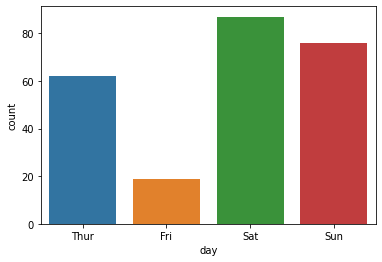

In [5]:
sns.countplot(data=tips, x="day")

#### What is the difference between a `barplot` and a `countplot`?

### Now the same, but using a scatterplot for a categorical x axis


<AxesSubplot:xlabel='day', ylabel='total_bill'>

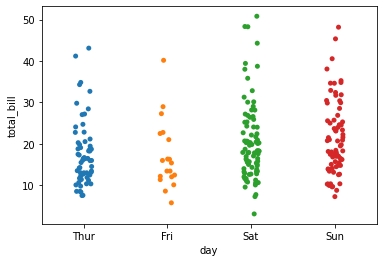

In [43]:
sns.stripplot(x="day", y="total_bill", data=tips)

Use a smaller amount of jitter:

<AxesSubplot:xlabel='day', ylabel='total_bill'>

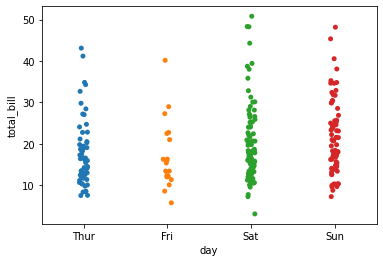

In [44]:
sns.stripplot(x="day", y="total_bill", data=tips, jitter=0.05)

Jitter plus a boxplot:

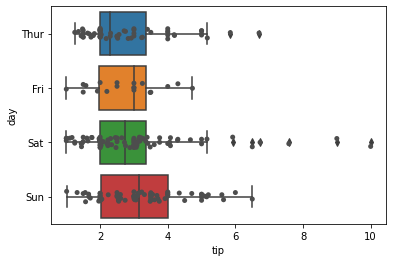

In [45]:
ax = sns.boxplot(x="tip", y="day", data=tips)
ax = sns.stripplot(x="tip", y="day", data=tips, color=".3")

---
[(menu)](#section0)

<a id='section2'></a>
## 2. Consider the scale - logs

In [46]:
diamonds = sns.load_dataset("diamonds")
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


scaling th y-axis:

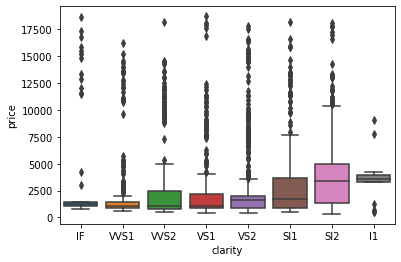

In [47]:
diamonds_i = diamonds.loc[(diamonds.cut == 'Ideal')&(diamonds.color == 'E')]
ax = sns.boxplot(x="clarity", y = diamonds_i.price, data=diamonds_i)

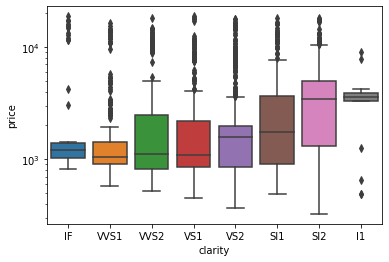

In [48]:
diamonds_i = diamonds.loc[(diamonds.cut == 'Ideal')&(diamonds.color == 'E')]
ax = sns.boxplot(x="clarity", y = diamonds_i.price, data=diamonds_i)
ax.set_yscale("log")
plt.show()

scaling the x-axis:

<AxesSubplot:xlabel='price', ylabel='Count'>

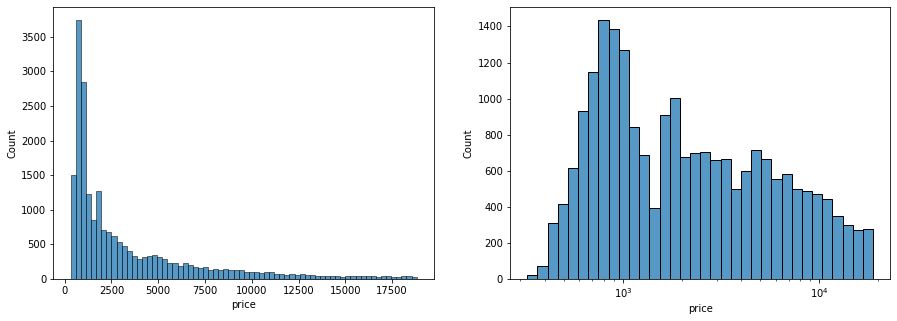

In [49]:
fig, axes = plt.subplots(figsize=(15, 5), ncols=2)
sns.histplot(diamonds.price[diamonds.cut == 'Ideal'], ax = axes[0])
sns.histplot(diamonds.price[diamonds.cut == 'Ideal'], log_scale = True, ax = axes[1])

[(menu)](#section0)

---
<a id='section3'></a>
## 3. Consider the baseline

Let look at a case were we have 2 binary variables: 'sex' and 'survived'

In [50]:
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


#### Plotting one categorical variable using countplot:
> ### <span style="color:blue"> Exercise:</span>
>
> plot two graphs, one for the passenger sex, one for the passenger class



> ### <span style="color:blue"> Exercise:</span>
>
>advanced: plot them side by side

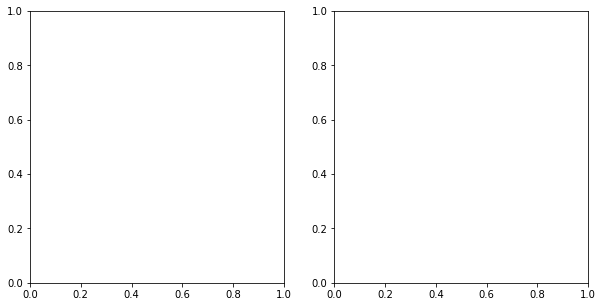

In [51]:
fig, axes = plt.subplots(figsize=(10, 5), ncols=2)
# add your code here:


Add `hue` to plot a countplot that compares two variables

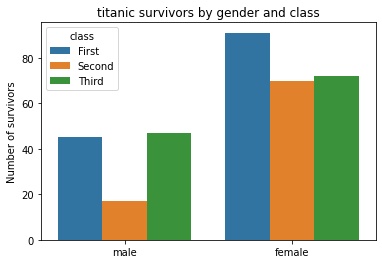

In [52]:
myorder = ["male", "female"]
sns.countplot(x="sex", hue="class",  data=titanic.loc[titanic["survived"] ==1], order = myorder)
plt.title("titanic survivors by gender and class")
plt.ylabel("Number of survivors")
plt.xlabel("")
plt.show()

Use barplot to plot percentages for two variables

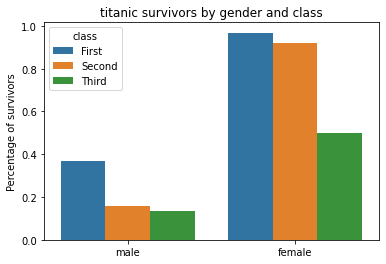

In [53]:
sns.barplot(x="sex", y="survived", hue="class",  ci = None, data=titanic)
plt.xlabel("")
plt.ylabel("Percentage of survivors")
plt.title("titanic survivors by gender and class")
plt.show()

That was easy since `survived` is binary. 
How do we plot percentages for non-binary data?

For example: let's plot the fare percentage


> ### <span style="color:blue"> Exercise:</span>
>
> what is the fare's sum?
>
> How do you suggest to compute percentage?

In [54]:
#sum:



In [55]:
#percentage:


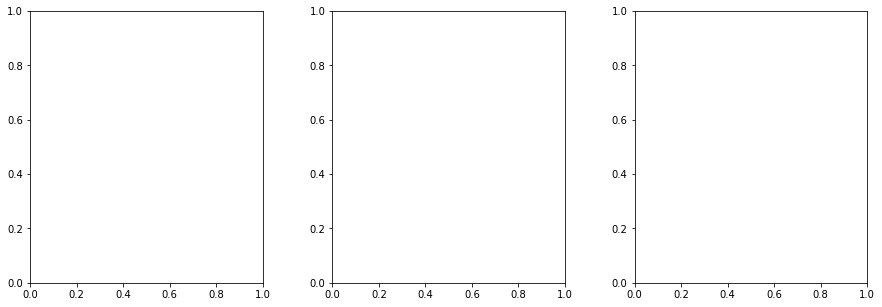

In [57]:
fig, axes = plt.subplots(figsize=(15, 5), ncols=3)
plt.subplots_adjust(wspace = 0.3)
#sns.barplot(x="class", y="fare",  ci = None, estimator = sum, data=titanic,ax=axes[0] )
#sns.barplot(x="class", y="fare_percent",   ci = None, estimator = sum, data=titanic, ax = axes[1])
#sns.countplot(x="class",   data=titanic, ax = axes[2])
plt.show()

[(menu)](#section0)

---
<a id='section4'></a>
## 4. Ease comparisons

Note what happens when we swap the hue and the x-axis. You can also remove the hue altogether (check what happens).

In [ ]:
sns.barplot(x="class", y="survived", hue="sex",  data=titanic)
plt.show()

##### Change the order of the x-axis:
By hand:

In [ ]:
sns.barplot(x="class", y="survived", hue="sex",  data=titanic, order=["Third", "Second", "First"])

### Add labels to the plot

Google it: [add text to plot seaborn](https://www.google.com/search?q=add+text+to+plot+seaborn&sxsrf=ALeKk01vym2w-SfYoAOBXBgUbDCr0I04Uw%3A1621255993821&ei=OWeiYObWMdCTkwXRoIngCw&oq=add+text+to+plot+seaborn&gs_lcp=Cgdnd3Mtd2l6EAMyAggAMgYIABAWEB4yBggAEBYQHjoHCCMQsAMQJzoHCAAQRxCwAzoECAAQQzoGCAAQBxAeUJAcWKgzYJs1aAFwAngAgAGeAYgBmgqSAQQwLjEwmAEAoAEBqgEHZ3dzLXdpesgBCcABAQ&sclient=gws-wiz&ved=0ahUKEwim1-ec4dDwAhXQyaQKHVFQArwQ4dUDCA4&uact=5_)

In [ ]:
penguins = sns.load_dataset("penguins")
penguins.head()

> ### <span style="color:blue"> Exercise:</span>
>
> plot the relationship between `bill_length_mm` and `bill_depth_mm`
>
> advanced: color the different species. use: palette = 'colorblind'
>
>

Without a legend but with text:

In [ ]:
#ax =  add here..

style = dict(size=12, color='black')
ax.text(35, 15, "Adelie",  **style)
ax.text(55, 20, "Chinstrap",  **style)
ax.text(52, 14, "Gentoo",  **style)
plt.show()

[(menu)](#section0)

---
<a id='section5'></a>
## 5. Set the scale

Google it: [set scale seaborn](https://www.google.com/search?q=set+scale+seaborn&sxsrf=ALeKk02NiH79RWrRRXIqusuG-vHfuyIm2A%3A1621254123926&ei=61-iYOiGOMyxkwWAiZjICQ&oq=set+scale+sea&gs_lcp=Cgdnd3Mtd2l6EAMYADIECCMQJzIGCAAQFhAeMgYIABAWEB4yBggAEBYQHjoHCCMQsAMQJzoHCAAQRxCwAzoCCAA6BQghEKABOggIABAIEA0QHlC8EVjyJmCULGgEcAJ4AIABogGIAbgHkgEDMC43mAEAoAEBqgEHZ3dzLXdpesgBCcABAQ&sclient=gws-wiz)

##### One option:

In [ ]:
ax = sns.stripplot(x="day", y="total_bill", data=tips, jitter=0.05)
ax.set(ylim=(0, 100))

##### Another option:

In [ ]:
plt.ylim(0, 400)
ax = sns.stripplot(x="day", y="total_bill", data=tips, jitter=0.05)